# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 2.6: Transformada Rápida de Fourier (FFT)

In [1]:
import math as m
import numpy as np
from time import time
import matplotlib.pyplot as plt

- A FFT é uma maneira eficiente de implementar a DFT, explorando a estrutura da matriz $F$;
- Forma atual se deve a Cooley & Tuckey (1966), mas partes da construção já existiam;
- A DFT implementada de forma ingênua tem complexidade $\mathcal{O}(N^2)$, pois cada coeficiente $X_k=\displaystyle\sum_{n=0}^{N-1}x_ne^{-i2\pi kn/N}$ requer $2N-1$ operações ($N$ multiplicações e $N-1$ somas), portanto para calcular $X=DFT(x)\in\mathbb{C}^N$ são necessárias $2N^2-N$ operações.
- É possível explorar as simetrias da DFT quando $x$ é real, como por exemplo $X_{N-k}=\overline{X_k},\ k=1,\ldots,\frac{N}{2}-1$, mas o custo continua proporcional a $N^2$.

A ideia simples do cálculo da DFT por recursão reside em considerar $N=2^B$
e particionar o vetor $x=(x_0,x_1,\ldots,x_{N-1})$ em duas partes:
$$x_{\mbox{par}}=(x_0,x_2,\ldots,x_{N-2})$$
e
$$x_{\mbox{ímpar}}=(x_1,x_3,\ldots,x_{N-1}),$$
e calcular separadamente as DFTs de cada um destes vetores, combinando os resultados. Esta estratégia é conhecida como *Divisão e Conquista*.


Note que
$$\begin{array}[t]{rl}
X_k&=\displaystyle\sum_{n=0}^{N-1}x_ne^{-i2\pi k\frac{n}{N}}\\
&=\displaystyle\sum_{n\ \mbox{par}}x_ne^{-i2\pi k\frac{n}{N}}+\sum_{n\ \mbox{ímpar}}x_ne^{-i2\pi k\frac{n}{N}}\\
&=\displaystyle\sum_{n=0}^{N/2-1}x_{2n}e^{-i2\pi k\frac{2n}{N}}+\sum_{n=0}^{N/2-1}x_{2n+1}e^{-i2\pi k\frac{2n+1}{N}}\\
&=\displaystyle\sum_{n=0}^{N/2-1}{(x_{\mbox{par}})}_{n}e^{-i2\pi k\frac{n}{N/2}}+e^{-i2\pi k\frac{1}{N}}\sum_{n=0}^{N/2-1}{(x_{\mbox{ímpar}})}_{n}e^{-i2\pi k\frac{n}{N/2}}\\
&=(X_{\mbox{par}})_k+e^{-i2\pi k\frac{1}{N}}(X_{\mbox{ímpar}})_k
\end{array}$$


Na expressão
$$\begin{array}{ll}
DFT(x)_k&=X_k=(X_{\mbox{par}})_k+e^{-i2\pi k\frac{1}{N}}(X_{\mbox{ímpar}})_k\\
&=DFT(x_{\mbox{par}})_k+e^{-i2\pi k\frac{1}{N}}DFT(x_{\mbox{ímpar}})_k,\end{array}$$
as duas últimas DFTs são periódicas com período $\frac{N}{2}$, e portanto para calcular todos os valores $X_k$ com $k=0,1,\ldots,N-1$, basta obter
$$\left.\begin{array}{ll}
\mbox{DFT}(x_{\mbox{par}})_k\\
\mbox{DFT}(x_{\mbox{ímpar}})_k
\end{array}\right\}\ \mbox{para}\ k=0,1,\ldots,\frac{N}{2}-1.$$
Essa é a forma recursiva da implementação da FFT.

### FFT(x) para $|x|=N=2^B$
> base: se $x\in\mathbb{C}^1$, devolva $X=x$
>
> calcule $X_{\mbox{par}}=FFT([x_0,x_2,\ldots,x_{N-2}])$
>
> calcule $X_{\mbox{ímpar}}=FFT([x_1,x_3,\ldots,x_{N-1}])$
>
> para $k=0,\ldots,N-1$ faça
>> $X_k = (X_{\mbox{par}})_{k \% N/2}+e^{-i2\pi k\frac{1}{N}}(X_{\mbox{ímpar}})_{k \% N/2}$
>
> devolva X

Sendo $C(N/2)$ o custo de computar cada FFT dos subvetores $X_{\mbox{par}}$ e $X_{\mbox{ímpar}}$, e levando em consideração que o custo de combinar as soluções é proporcional a $N$ (uma multiplicação e uma soma para cada coeficiente $X_k$), o custo da chamada FFT(x) será
$$\begin{array}{rl}
C(N) &= 2C(N/2)+\alpha N\quad\quad(\alpha\ \mbox{constante})\\
&= 2\left(2C(N/4)+\alpha N/2\right) +\alpha N= 4C(N/4)+2\alpha N\\
&= 4\left(2C(N/8)+\alpha N/4\right)+2\alpha N= 8C(N/8)+3\alpha N = 2^3C(N/2^3)+3\alpha N\\
&= 2^4C(N/2^4)+4\alpha N\\
&=\quad\cdots\quad\mbox{(depois de $B\ $ passos)}\quad\cdots\\
&=2^B C(N/2^B)+B\alpha N\\
&=NC(1)+\alpha NB\\
&=\beta N+\alpha N\log N \quad\quad(\beta\ \mbox{constante})\\
&={\mathcal{O}}(N\log N)
\end{array}$$


### Implementação em Python da DFT ingênua

In [26]:
def DFTingenua(x):
    N = len(x); 
    n = np.array(range(N))
    X = np.ndarray(N, dtype=complex)
    for k in range(N):
        X[k] = sum(x*np.exp(-1j*2*m.pi*k*n/N))
    return X

# teste simples: DFT(Dirac)=[1,1,...,1]
# x = [ 1, 0, 0, 0 ]
# X = DFTingenua(x)
# print(X)

def dft(x):
    N = len(x)
    n = np.array(range(N))
    indices = n.reshape((N,1)) * n
    Ek = np.exp(-1j*2*m.pi/N*indices)
    X = np.inner(x, Ek)
    return X

def dft2(x):
    N = len(x)
    t = np.linspace(0,1,N, endpoint=False)
    X = np.ndarray(N, dtype=complex)
    for k in range(N):
        Ek = np.exp(-1j*2*m.pi*k*t)
        X[k] = sum(x * Ek )
    return X
        

def test_fft(dut, N=100, verbose=False):
    x = np.random.randn(N)
    
    golden = np.fft.fft(x)
    result = dut(x)
    if verbose:
        print(golden)
        print(result)
    
    assert np.allclose(golden, result) == True , 'Ihh, falhou!'
    print('Teste OK')
    
test_fft(dft, N=400)

Teste OK


### Implementação em Python da FFT

In [3]:
def FFT(x):
    N = len(x);
    # testa se N é potência de 2
    if (N & (N-1) != 0):
        raise ValueError('Essa FFT só funciona para N potência de 2')
        
    if N<=1: 
        return x # base da recursão: N=0,1
    
    X = np.ndarray(N, dtype=complex)
    Xpar = FFT(x[0:N:2])
    Ximpar = FFT(x[1:N:2])
    
    for k in range(N):
        X[k] = Xpar[k%(N//2)]+np.exp(-1j*2*m.pi*k/N)*Ximpar[k%(N//2)]
    return X

# teste simples: DFT(Dirac)=[1,1,...,1]
x = [ 1, 0, 0, 0 ]
X = FFT(x)
print(X)

[1.+0.j 1.+0.j 1.+0.j 1.+0.j]


### Comparação de tempos entre DFT e FFT

In [7]:
# comparação de tempo
N = [2**B for B in np.arange(12)] # tamanhos de vetor
TDFT = np.zeros(len(N)) # tempos de execução
TFFT = np.zeros(len(N)) # tempos de execução
R = 10 # número de repetições para cada N
print("Rodando experimento...")
for r in range(R):
    for i in range(len(N)):
        x = np.random.rand(N[i])
        t = time(); DFTingenua(x); TDFT[i] += (time()-t)/R
        t = time(); FFT(x); TFFT[i] += (time()-t)/R
    print("{}% completado...".format(100*(r+1)/R),end="\r")
print("Pronto!             ")

Rodando experimento...
Pronto!             


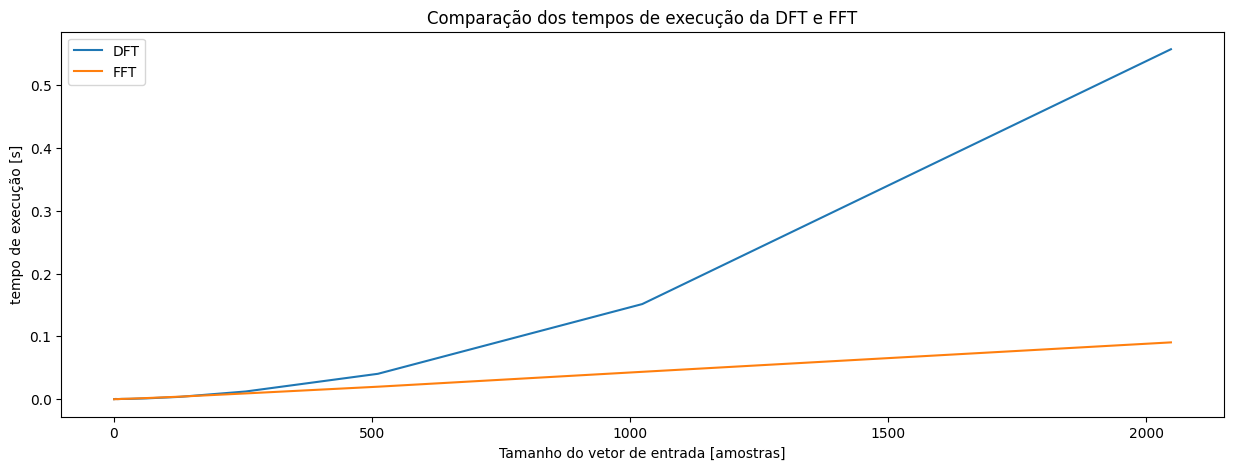

In [8]:
plt.figure(figsize=(15,5))
plt.plot(N,TDFT,label="DFT")
plt.plot(N,TFFT,label="FFT")
plt.title("Comparação dos tempos de execução da DFT e FFT")
plt.xlabel("Tamanho do vetor de entrada [amostras]")
plt.ylabel("tempo de execução [s]")
plt.legend()
plt.show()